In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('whitegrid')

In [41]:
# Load the dataset
df = pd.read_csv('houses_to_rent_brazil_kaggle.csv')
df


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [42]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


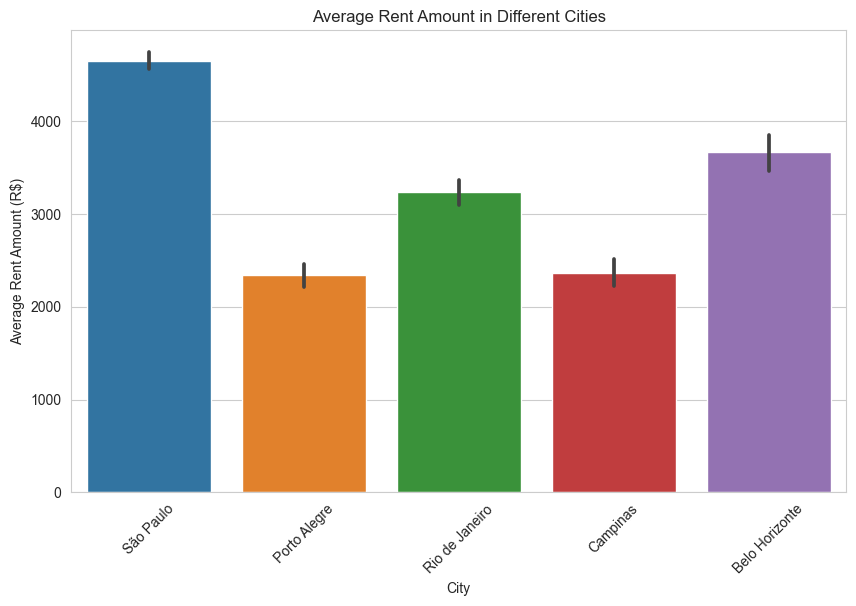

In [43]:
# Data Visualization (Sample Plots)
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='rent amount (R$)', data=df)
plt.title('Average Rent Amount in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Rent Amount (R$)')
plt.xticks(rotation=45)
plt.show()

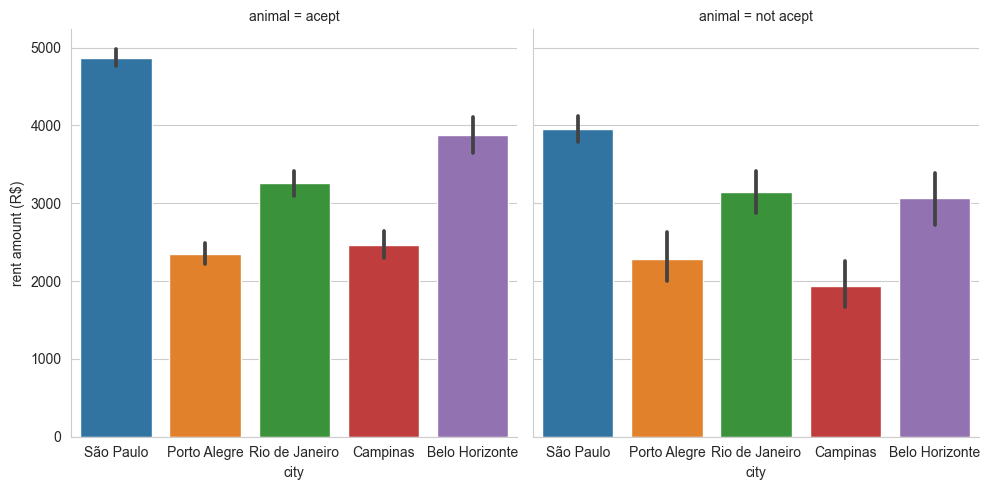

In [44]:
sns.catplot(x = 'city', y = 'rent amount (R$)', col='animal', data=df, kind='bar')

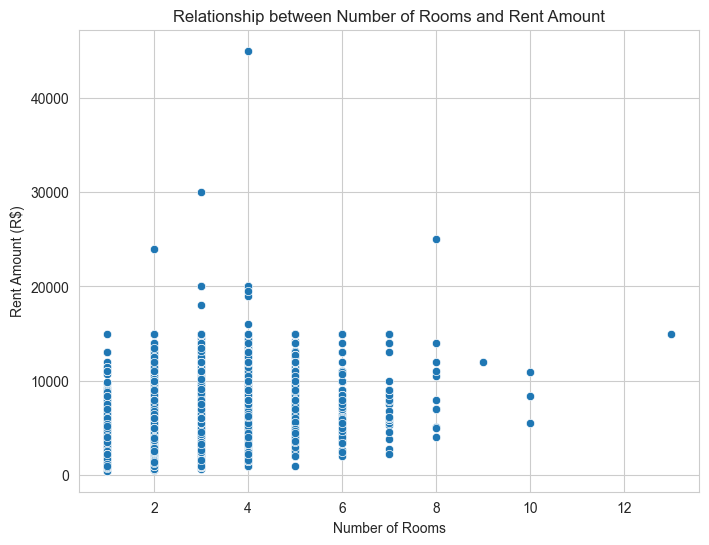

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rooms', y='rent amount (R$)', data=df)
plt.title('Relationship between Number of Rooms and Rent Amount')
plt.xlabel('Number of Rooms')
plt.ylabel('Rent Amount (R$)')
plt.show()

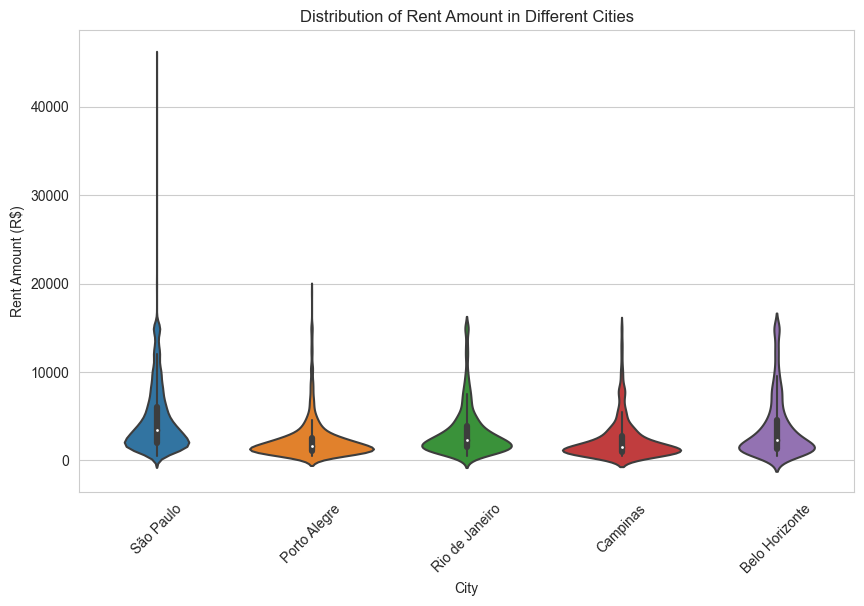

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='city', y='rent amount (R$)', data=df)
plt.title('Distribution of Rent Amount in Different Cities')
plt.xlabel('City')
plt.ylabel('Rent Amount (R$)')
plt.xticks(rotation=45)
plt.show()

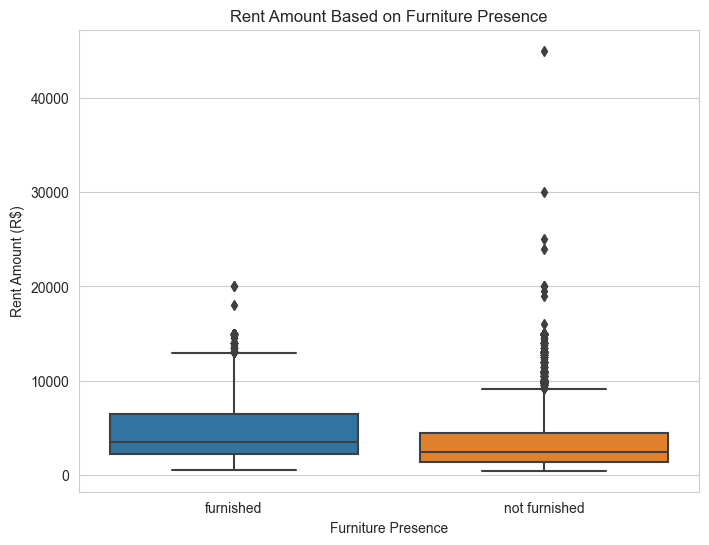

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='furniture', y='rent amount (R$)', data=df)
plt.title('Rent Amount Based on Furniture Presence')
plt.xlabel('Furniture Presence')
plt.ylabel('Rent Amount (R$)')
plt.show()